# Unsupervised learning

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Clustering/Cust_Segmentation.csv")
df.head(10)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
5,6,40,1,23,81,0.998,7.831,NaN,NBA016,10.9
6,7,38,2,4,56,0.442,0.454,0.0,NBA013,1.6
7,8,42,3,0,64,0.279,3.945,0.0,NBA009,6.6
8,9,26,1,5,18,0.575,2.215,NaN,NBA006,15.5
9,10,47,3,23,115,0.653,3.947,0.0,NBA011,4.0


In [4]:
df.tail(10)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
840,841,38,3,13,25,0.343,1.082,0.0,NBA018,5.7
841,842,29,3,7,63,0.572,2.893,0.0,NBA001,5.5
842,843,32,1,14,36,0.273,0.591,0.0,NBA000,2.4
843,844,32,2,8,45,0.982,0.683,0.0,NBA002,3.7
844,845,41,1,7,43,0.694,1.198,0.0,NBA011,4.4
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9
849,850,52,1,16,64,1.866,3.638,0.0,NBA025,8.6


In [5]:
df.isnull().sum()

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
Address              0
DebtIncomeRatio      0
dtype: int64

In [6]:
df.shape

(850, 10)

In [7]:
df[df['Defaulted'].isna()]

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
5,6,40,1,23,81,0.998,7.831,NaN,NBA016,10.9
8,9,26,1,5,18,0.575,2.215,NaN,NBA006,15.5
11,12,34,2,9,40,0.374,0.266,NaN,NBA003,1.6
13,14,46,1,6,30,1.415,3.865,NaN,NBA019,17.6
15,16,24,1,1,16,0.185,1.287,NaN,NBA005,9.2
...,...,...,...,...,...,...,...,...,...,...
818,819,35,2,0,35,2.383,1.957,NaN,NBA006,12.4
820,821,37,1,4,24,0.419,2.989,NaN,NBA010,14.2
825,826,32,2,12,116,4.027,2.585,NaN,NBA011,5.7
835,836,21,3,0,41,2.367,5.628,NaN,NBA001,19.5


In [8]:
df['Defaulted']

0      0.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
845    NaN
846    0.0
847    1.0
848    0.0
849    0.0
Name: Defaulted, Length: 850, dtype: float64

In [9]:
a = df.fillna(method='ffill',axis=1)

In [10]:
a.isna().sum()

Customer Id        0
Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
Address            0
DebtIncomeRatio    0
dtype: int64

In [11]:
from sklearn.cluster import KMeans

In [12]:
k = KMeans()

In [13]:
kmeans = KMeans(n_clusters=4,init='k-means++')

In [14]:
a = a.drop('Address',axis=1)

In [15]:
a.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0,6.3
1,2,47,1,26,100,4.582,8.218,0,12.8
2,3,33,2,10,57,6.111,5.802,1,20.9
3,4,29,2,4,19,0.681,0.516,0,6.3
4,5,47,1,31,253,9.308,8.908,0,7.2


In [16]:
kmeans.fit(a)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
khat = kmeans.predict(a)
khat

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [18]:
import matplotlib.pyplot as plt

In [19]:
b = pd.read_csv("https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Clustering/Absenteeism_at_work.csv")
b.head()

,Unnamed: 0,Individual_identification,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,0,11,26,7,3,1,289,36,13,33,...,0,1,2,1,0,1,90,172,30,4
1,1,36,0,7,3,1,118,13,18,50,...,1,1,1,1,0,0,98,178,31,0
2,2,3,23,7,4,1,179,51,18,38,...,0,1,0,1,0,0,89,170,31,2
3,3,7,7,7,5,1,279,5,14,39,...,0,1,2,1,1,0,68,168,24,4
4,4,11,23,7,5,1,289,36,13,33,...,0,1,2,1,0,1,90,172,30,2


In [20]:
b.columns

Index(['Unnamed: 0', 'Individual_identification', 'Reason_for_absence',
       'Month_of_absence', ' Day_of_the_week', 'Seasons',
       'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', ' Work_load_Average', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours'],
      dtype='object')

In [21]:
b = b.drop('Unnamed: 0',axis=1)

In [22]:
b.head()

,Individual_identification,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


In [23]:
b.isnull().sum()

Individual_identification          0
Reason_for_absence                 0
Month_of_absence                   0
 Day_of_the_week                   0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
 Work_load_Average                 0
Hit_target                         0
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
Absenteeism_time_in_hours          0
dtype: int64

In [24]:
kmeans = KMeans(n_clusters=8,init='random')

In [25]:
kmeans.fit(b)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=8,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [26]:
kmeans.fit(b)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=8,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [27]:
b_hat =kmeans.predict(b)

In [28]:
b_hat

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,

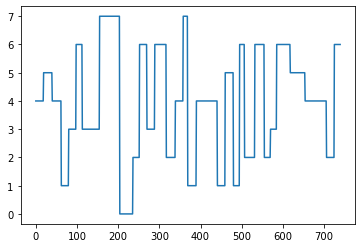

In [29]:
plt.plot(b_hat)